In [24]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

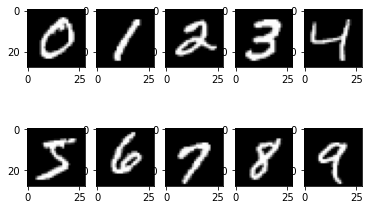

In [25]:
(train_X, train_y),(_, _) = mnist.load_data()

train_filter = np.unique(train_y, return_index=True)
X_train, Y_train = train_X[train_filter[1:]], train_y[train_filter[1:]]

fig, axs = plt.subplots(2, 5)
k = 0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(X_train[k], cmap = 'gray')
        k+=1
    
plt.show()

In [26]:
ints_list = np.random.randint(0, 10, 100)

def generate_image_strings(images):
    text_target = []
    text_images = []

    for _ in range(110):
        string_target = np.random.randint(0, 10, 100)
        string_image = images[string_target].reshape(100,1,28*28)
        text_target.append(string_target)
        text_images.append(string_image)
    return np.array(text_target), np.array(text_images)

    

[7 9 1 1 4 2 9 8 2 5 6 9 0 9 2 8 1 9 1 0 1 4 0 4 4 8 7 4 1 7 8 4 0 2 2 6 1
 6 9 6 1 6 1 0 4 2 5 0 9 9 4 6 3 0 7 2 6 5 5 6 9 4 9 7 8 9 0 0 2 4 7 3 1 3
 2 8 6 6 9 0 3 3 7 6 8 2 6 3 4 8 8 1 8 5 4 7 0 4 6 8]


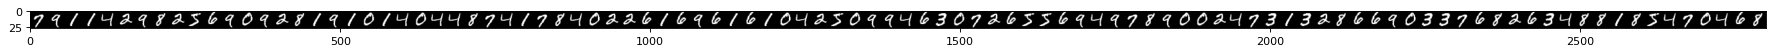

----------------
[5 9 3 4 0 3 2 0 5 2 1 7 2 6 3 2 0 0 1 9 0 1 2 8 0 6 7 5 7 1 8 2 1 6 9 2 3
 3 6 0 9 4 8 7 4 9 3 3 5 1 2 9 8 8 8 8 0 0 5 4 8 7 7 7 6 0 7 9 4 1 9 9 0 6
 1 8 0 1 7 3 6 1 7 4 7 8 9 1 8 2 4 3 8 6 6 4 9 3 7 8]


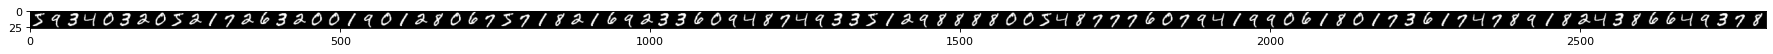

----------------
[3 3 1 7 4 4 9 5 4 1 3 4 8 7 8 0 1 8 1 3 5 1 2 4 9 9 5 1 7 1 0 2 9 8 7 3 7
 8 2 4 8 4 7 0 5 5 3 7 3 6 7 7 9 7 9 2 8 5 7 4 5 0 8 5 2 0 9 3 2 8 5 8 6 8
 1 6 2 1 6 6 7 6 1 5 6 6 4 1 2 4 7 1 5 1 0 2 9 3 0 6]


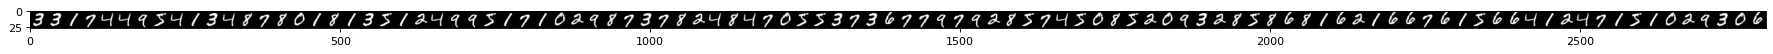

----------------


In [27]:
targets , images = generate_image_strings(X_train)

def visualize(images,targets):
    for i in [20, 50, 109]:
        print(targets[i])
        figure(figsize=(28, 22), dpi=80)
        plt.imshow(np.concatenate(images[i].reshape(100,28,28),axis = 1),cmap = 'gray')
        plt.show()
        print("----------------")

visualize(images,targets)

[7 9 1 1 4 2 9 8 2 5 6 9 0 9 2 8 1 9 1 0 1 4 0 4 4 8 7 4 1 7 8 4 0 2 2 6 1
 6 9 6 1 6 1 0 4 2 5 0 9 9 4 6 3 0 7 2 6 5 5 6 9 4 9 7 8 9 0 0 2 4 7 3 1 3
 2 8 6 6 9 0 3 3 7 6 8 2 6 3 4 8 8 1 8 5 4 7 0 4 6 8]


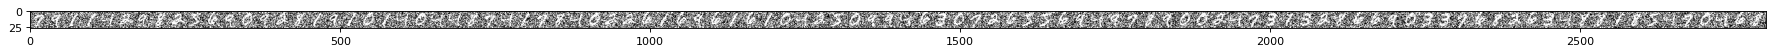

----------------
[5 9 3 4 0 3 2 0 5 2 1 7 2 6 3 2 0 0 1 9 0 1 2 8 0 6 7 5 7 1 8 2 1 6 9 2 3
 3 6 0 9 4 8 7 4 9 3 3 5 1 2 9 8 8 8 8 0 0 5 4 8 7 7 7 6 0 7 9 4 1 9 9 0 6
 1 8 0 1 7 3 6 1 7 4 7 8 9 1 8 2 4 3 8 6 6 4 9 3 7 8]


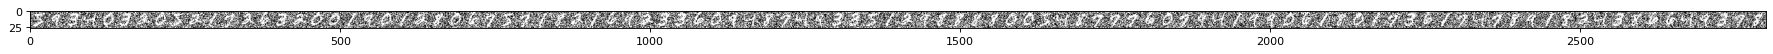

----------------
[3 3 1 7 4 4 9 5 4 1 3 4 8 7 8 0 1 8 1 3 5 1 2 4 9 9 5 1 7 1 0 2 9 8 7 3 7
 8 2 4 8 4 7 0 5 5 3 7 3 6 7 7 9 7 9 2 8 5 7 4 5 0 8 5 2 0 9 3 2 8 5 8 6 8
 1 6 2 1 6 6 7 6 1 5 6 6 4 1 2 4 7 1 5 1 0 2 9 3 0 6]


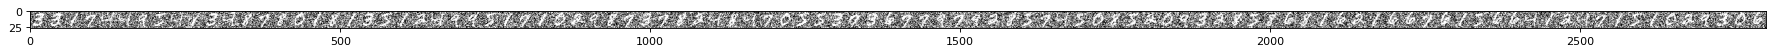

----------------


In [28]:
def add_gauss_noise(image, mean = 128, var = 128):
    image = image + np.random.normal(loc = mean, scale = var, size=image.shape)
    image = np.clip(image, 0, 255)
    return image

noise_images = []
for image in images:
    image = add_gauss_noise(image)
    noise_images.append(image)

noise_images = np.array(noise_images)
visualize(noise_images,targets)


In [29]:
def perceptron(x,y,lambd):
    for k in range(len(lambd)):
        encoded_x = np.zeros(x.shape)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if k == y[i][j]: 
                    encoded_x[i][j] = x[i][j]
                else:
                    encoded_x[i][j] = -x[i][j]

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if np.dot(lambd[k],encoded_x[i][j][0])<=0:  
                    lambd[k]+=encoded_x[i][j][0]
    return lambd

In [30]:
train_x, train_y, test_x, test_y = noise_images[:10],targets[:10],noise_images[10:],targets[10:]

In [31]:
lambd = np.zeros((10,28*28))
lambd = perceptron(train_x,train_y,lambd)

Target =  7 Predicted =  9


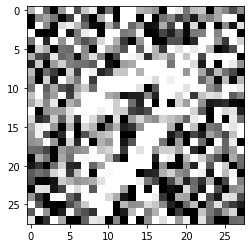

--------------------------------------------------------
Target =  7 Predicted =  9


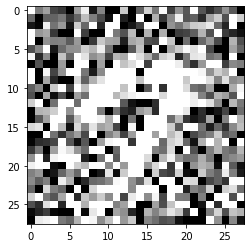

--------------------------------------------------------
Target =  8 Predicted =  9


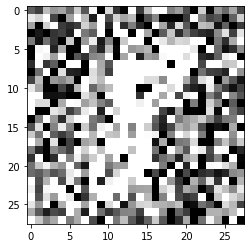

--------------------------------------------------------


In [32]:
predicts = []
targets = []
for i in range(test_x.shape[0]):
    for j in range(test_x.shape[1]):
        target = test_y[i][j]
        targets.append(target)
        predict = np.zeros(10)
        for z in range(10):
            predict[z] = np.dot(lambd[z],test_x[i][j][0])
        predict = np.argmax(predict)
        predicts.append(predict)
        if predict!=target:
            print('Target = ',target, "Predicted = ",predict)
            plt.imshow(test_x[i][j][0].reshape(28,28),cmap = 'gray')
            plt.show()
            print('--------------------------------------------------------')

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(targets,predicts)

0.9997